## Лабораторная 2. Кластерный анализ методом к-средних (k-means)

Первые шаги перед кластеризацией по подготовке данных абсолютно такие же как в 1 лабораторной, поэтому просто повторим их.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./Econom_Cities_data.csv", sep=";", decimal = ',', index_col = 'City')

df = df.drop(['Cairo', 'Jakarta'])

scaler = StandardScaler()
scaler.fit(df)
ndf = scaler.transform(df)
ndf = pd.DataFrame(ndf, index=df.index, columns=df.columns)

#### Кластеризация методом k-means

In [4]:
from sklearn.cluster import KMeans

Посмотрим, какое число кластеров будет оптимальным по данному методу. 

Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод inertia_ вернёт сумму квадратов расстояний от каждой точки данных до центра ближайшего к ней кластера. Кластеризацию будем считать условно хорошей, если инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

Пусть нам построят модели для ситуаций от 2 до 24 кластеров.

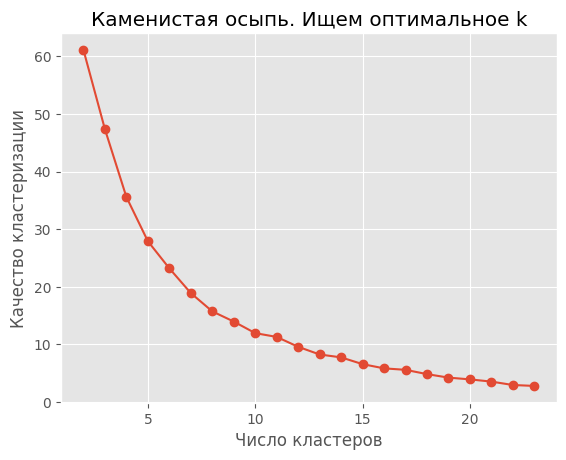

In [11]:
K = range(2, 24)
models = [KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10, 
               verbose=0, tol=0.0001).fit(ndf) for k in K]
dist = [model.inertia_ for model in models]
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')

plt.show()

Можно заметить по диаграмме, что после 4-5 кластера падение замедляется, что свидетельствует о том, что количество оптимальных кластеров 4-5. 

Так как в 1 лабораторной мы рассмотрели случай с 4 кластерами, посмотрим на разбиение на 5. 

In [13]:
model = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(ndf)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,2146.875000,48.762500,12.412500
1,1990.833333,77.233333,55.316667
2,1732.000000,78.135714,53.614286
3,1868.750000,52.158333,17.458333
4,1780.500000,108.550000,71.300000


#### Интрепретация полученных кластеров

0. ***Трудовые мегаполисы***, где много работают при низких ценах и зарплатах.
1. ***Сбалансированные центры*** с умеренными ценами и достойной оплатой труда.
2. ***Развивающиеся города*** с чуть меньшими зарплатами и похожим уровнем цен.
3. ***Дешёвые трудовые рынки*** с низкими ценами и низкими доходами.
4. ***Богатые столицы***  с самыми высокими зарплатами и коротким рабочим годом.


По сравнению с предыдущим разделением кластер с неразвитыми городами разделился на те, в которых очень много работают за минимальную оплату, и те, в которых работают примерно столько же в среднем, но цены и зарплаты значительно ниже. 